# example using US Census TIGER dataset

In [1]:
import isolines as il
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString


## 1. Using an existing edges GeoDataFrame - the US Census TIGER dataset

In this example we will use the us census TIGER dataset that contains road network data from the entire USA.
The edges shapefiles are freely available here: https://www2.census.gov/geo/tiger/TIGER2019/EDGES/.
Each file contains edges data for a US county.



### 1.1 Uploading the data as a geopandas GeoDataFrame

In [2]:
df = gpd.GeoDataFrame.from_file('../data/tl_2019_36047_edges/tl_2019_36047_edges.shp')

In [3]:
df.head()

,STATEFP,COUNTYFP,TLID,TFIDL,TFIDR,MTFCC,FULLNAME,SMID,LFROMADD,LTOADD,...,TTYP,DECKEDROAD,ARTPATH,PERSIST,GCSEFLG,OFFSETL,OFFSETR,TNIDF,TNIDT,geometry
0,36,047,640865309,209916182,265495023,S1400,New Dock St,None,98,2,...,None,N,N,None,N,N,N,424150561,424716681,LINESTRING (-73.99321999999998 40.703555999999...
1,36,047,59083079,209916183,209916184,S1400,Cornelia St,294,361,401,...,None,N,N,None,N,N,N,39249580,39256691,"LINESTRING (-73.90955099999999 40.696271, -73...."
2,36,047,59083088,209916186,209919586,S1400,Irving Ave,294,471,499,...,None,N,N,None,N,N,N,39249589,39249594,"LINESTRING (-73.908047 40.695417, -73.907296 4..."
3,36,047,59099853,209916192,209916196,S1400,Prospect St,294,None,None,...,None,N,N,None,N,N,N,39245062,39245145,"LINESTRING (-73.98972999999999 40.700734, -73...."
4,36,047,638283003,260571155,260570802,S1400,Prince St,None,None,None,...,None,N,N,None,N,N,N,424148458,39246493,LINESTRING (-73.98230599999998 40.697417999999...


### 1.2 pre-process the data
since the isolines/isochrones network is a directed multi graph, we will need to duplicate the edges in the opposite direction, since in the original dataset each edge appears only in one direction.

If we were to set a driving network we should consider one-way edges as well.

In [4]:
df2 = df.copy()
df2['TNIDF'] = df['TNIDT'].copy()
df2['TNIDT'] = df['TNIDF'].copy()
## reverse the line geometry coordinate sequence
df2['geometry'] = df['geometry'].apply(lambda x: LineString(x.coords[::-1]))

In [5]:
df = pd.concat([df, df2]).reset_index(drop = True)

### 1.3 create isochrones based on our edges geodataframe

we will have to pass the edges dataframe's to column, from column and edges id column names to the isoliner instance:

```
edge_idcol = 'TLID', 
fromcol = 'TNIDF',
tocol = 'TNIDT',
```

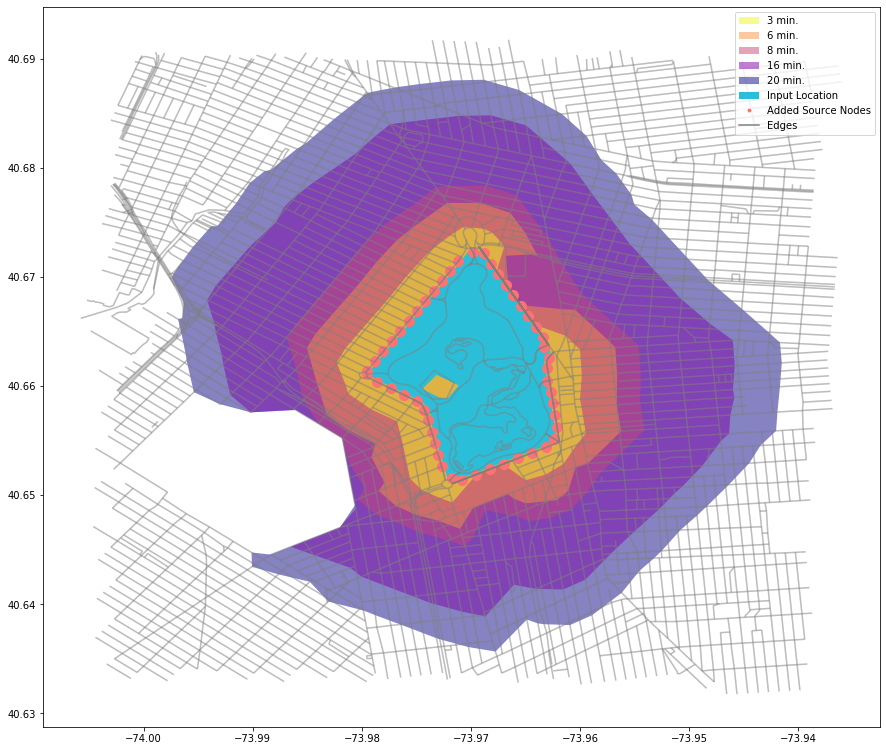

In [9]:
tiger = il.GpdIsolines('Prospect Park, Brooklyn, NYC, USA',
                            edges = df,
                            network_type = 'walk',
                            metric = 'time',
                            values=[3, 6, 8, 16, 20],
                            speed = 300,
                            unit= 'ft',
                            address_type='all',
                            edge_idcol = 'TLID', 
                            fromcol = 'TNIDF',
                            tocol = 'TNIDT',
                            sample= 400,
                            knn = 50
                                 )

tiger.plot_isolines()

### 1.4 compare to the OpenStreetMap network 

In [8]:
self = il.OsmIsolines('Prospect Park, Brooklyn, NYC, USA',
                                 network_type = 'walk',
                                 metric = 'time',
                                 values=[3, 6, 8, 16, 20],
                                 speed = 300,
                                 unit = 'ft',
                                 address_type='all',
                                 knn = 50
                                 
                                 )

Finished downloading graph from OSM using osmnx, time elapsed: 11.993836879730225 seconds.


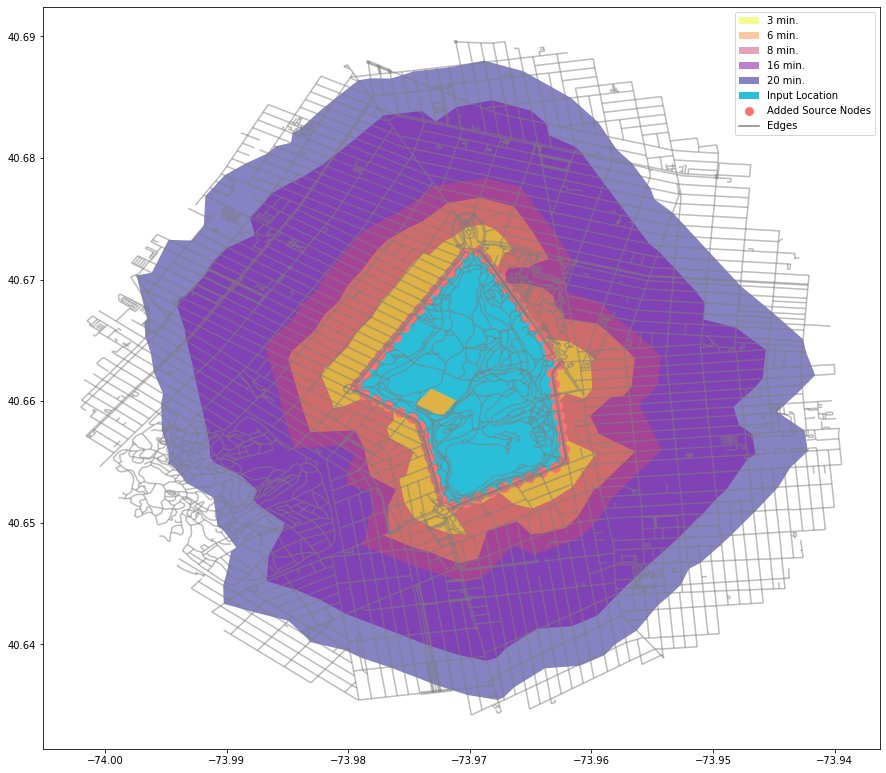

In [10]:
self.plot_isolines()